# M小白实验室

第二期： 黑科技实现声音分离

作者：M小白

网站：mwhitelab.com

公众号：技术杂学铺

- wave wave音频数据处理
- matplotlib 绘图
- numpy 用于科学计算
- scipy.signal 声音处理

In [1]:
import wave
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

# 不输出waring警告
import warnings
warnings.filterwarnings('ignore')

# 1. Wav文件操作

### 1.1 WAV数据读入
参考借鉴[用python做科学计算-声音的输入输出](https://wizardforcel.gitbooks.io/hyry-studio-scipy/content/17.html)

In [2]:
def printWAV(filename):
    # 打开WAV文档
    f = wave.open(filename, "rb") # 2进制打开 2进制文件
    # 读取格式信息
    # (nchannels, sampwidth, framerate, nframes, comptype, compname)
    params = f.getparams()
    nchannels, sampwidth, framerate, nframes = params[:4] # 声道，量化位数（byte单位），采样频率，文件采样数据数
    # 读取波形数据
    str_data = f.readframes(nframes) # 读取数据 str_data为二进制字符串
    f.close()

    #将波形数据转换为数组
    wave_data = np.fromstring(str_data, dtype=np.short) # 二进制数据-》数字
    time = np.arange(0, nframes) * (1.0 / framerate) # 长度归一
    if nchannels==2:
        wave_data.shape = -1, 2 #先储存本时刻的双声道数据，再储存下一个时刻的 先左后右
        wave_data = wave_data.T #转置    
        # 绘制波形
        plt.subplot(211) 
        plt.plot(time, wave_data[0])
        plt.subplot(212) 
        plt.plot(time, wave_data[1], c="g")
    else:
        plt.plot(time, wave_data)
    plt.xlabel("time (seconds)")
    
    plt.show()
    return wave_data

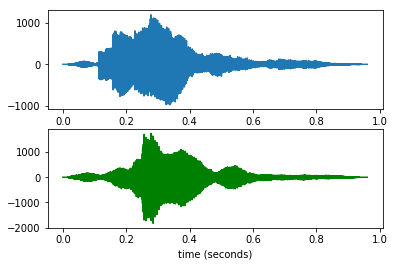

In [3]:
wave_data = printWAV(r"c:\WINDOWS\Media\Windows Shutdown.wav")

In [4]:
wave_data.shape

(2, 42350)

In [5]:
wave_data[0][11000:11100]

array([ 544,  413,  263,  137,   15, -124, -253, -369, -463, -511, -545,
       -587, -632, -678, -701, -687, -659, -623, -579, -539, -473, -380,
       -282, -162,  -35,   78,  211,  341,  430,  499,  548,  551,  543,
        520,  456,  371,  282,  174,   71,   -7,  -80, -127, -146, -167,
       -176, -162, -160, -187, -179, -106, -109,  -75,   54,   75,   37,
          5,  263,  473,  340,  428,  596,  673,  642,  576,  577,  475,
        303,  195,  150,  -51, -273, -353, -419, -552, -643, -594, -583,
       -623, -672, -663, -613, -608, -641, -638, -556, -466, -377, -281,
       -139,   13,  130,  287,  520,  703,  747,  787,  873,  881,  814,
        746], dtype=int16)

### 1.2 WAV写文件

标准正弦波

In [6]:
framerate = 44100
time = 2
FREQUENCY = 500

t = np.arange(0, time, 1.0/framerate) # 开始，截止，步伐
wave_data = signal.chirp(t, FREQUENCY, time, FREQUENCY, method='linear') * 10000 # chrip函数返回的数组为float64
wave_data = wave_data.astype(np.short) # 改数据类型 16bit

# 打开WAV文档
f = wave.open(r"sin.wav", "wb")

# 配置声道数、量化位数和取样频率
f.setnchannels(1)
f.setsampwidth(2) #16bit
f.setframerate(framerate)
# 将wav_data转换为二进制数据写入文件
f.writeframes(wave_data.tostring())
f.close()

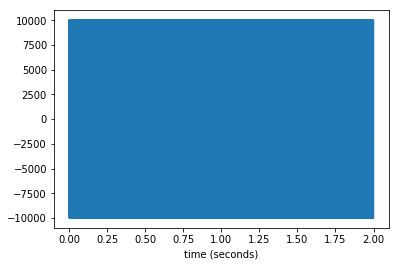

array([10000,  9974,  9898, ...,  9772,  9898,  9974], dtype=int16)

In [7]:
printWAV(r"sin.wav")

左右双声道

In [8]:
framerate = 44100
time = 5
change_time = 0.3

t = np.arange(0, time, 1.0/framerate) # 开始，截止，步伐
wave_data_s = signal.chirp(t, 500, time, 500, method='linear') * 20000# chrip函数返回的数组为float64
wave_data_s = wave_data_s * np.sin(t*2*np.pi*change_time) 
wave_data_s = wave_data_s.astype(np.short) # 改数据类型 16bit

wave_data_c = signal.chirp(t, 500, time, 500, method='linear') * 20000# chrip函数返回的数组为float64
wave_data_c = wave_data_c * np.cos(t*2*np.pi*change_time)
wave_data_c = wave_data_c.astype(np.short) # 改数据类型 16bit

wave_data = np.concatenate([wave_data_s,wave_data_c])
wave_data.shape = 2,-1
wave_data = wave_data.T.flatten()

f = wave.open(r"double.wav", "wb")
f.setnchannels(2)
f.setsampwidth(2) #16bit
f.setframerate(framerate)
f.writeframes(wave_data.tostring())
f.close()

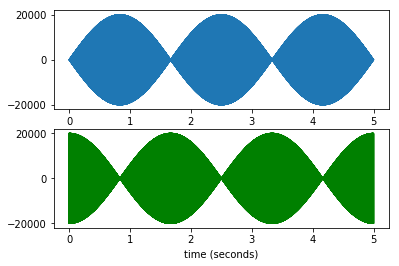

array([[     0,      0,      1, ...,      2,      1,      0],
       [ 20000,  19949,  19797, ..., -19544, -19797, -19949]], dtype=int16)

In [9]:
printWAV(r"double.wav")

频率变换

In [10]:
framerate = 44100
time = 5

# 产生10秒44.1kHz的100Hz - 1kHz的频率扫描波
t = np.arange(0, time, 1.0/framerate) # 开始，截止，步伐
wave_data = signal.chirp(t, 100, time, 1000, method='linear') * 10000 # chrip函数返回的数组为float64
wave_data = wave_data.astype(np.short) # 改数据类型 16bit

f = wave.open(r"sweep.wav", "wb")
f.setnchannels(1)
f.setsampwidth(2) #16bit
f.setframerate(framerate)
f.writeframes(wave_data.tostring())
f.close()

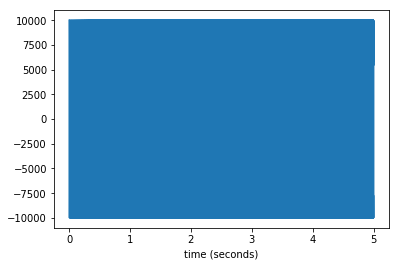

array([10000,  9998,  9995, ...,  9100,  9596,  9898], dtype=int16)

In [11]:
printWAV(r"sweep.wav")

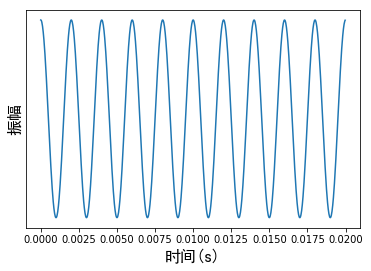

In [12]:
DIV = 100

f = wave.open(r"sin.wav", "rb")
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4] # 声道，量化位数（byte单位），采样频率，文件采样数据数
# 读取波形数据
str_data = f.readframes(nframes) # 读取数据 str_data为二进制字符串
f.close()

#将波形数据转换为数组
wave_data = np.fromstring(str_data, dtype=np.short) # shape 二进制数据-》数字
time = np.arange(0, nframes/DIV) * (1.0 / framerate) # 长度归一
plt.plot(time, wave_data[5*int(nframes/DIV):6*int(nframes/DIV)])
plt.xlabel("时间(s)", fontproperties="SimHei",fontsize=16)
plt.ylabel("振幅", fontproperties="SimHei",fontsize=16)
plt.yticks([])
# plt.xticks([])
plt.show()

# 2. ICA实现声音分离

### 2.1 手写算法版

In [13]:
# 超参数
LEARNING_RATE = 0.01
STEP = 50000
SAMPLE_PER_STPE = 2
Last = 882000 # 取最后的一段
framerate = 44100

In [14]:
def readWAV(filename,printWAV = False,Last = 0): 
    '''
    读取WAV数据，返回单声道数据
    '''
    f = wave.open(filename, "rb")
    params = f.getparams()
    nchannels, sampwidth, framerate, nframes = params[:4]
    print(params)
    str_data = f.readframes(nframes)
    f.close()
    
    wave_data = np.fromstring(str_data, dtype='int'+str(8*sampwidth))

    if nchannels==2:
        wave_data.shape = -1, 2
        wave_data = wave_data.T
        wave_data = (wave_data[0]+wave_data[1])/2
        nframes = nframes/2
    if Last:
        wave_data = wave_data[-Last:]
        nframes = Last
    
    if printWAV:
        time = np.arange(0, nframes) * (1.0 / framerate)
        plt.plot(time, wave_data)
        plt.xlabel("time (seconds)")
        plt.show()
    return wave_data

In [15]:
def sigmoid(X):
    return 1/(1+np.exp(-np.array(X)))

def train(X,size=2,printResult=False):
    '''
    寻找A的逆矩阵——W，使用了梯度下降法
    '''
    train_len = len(X[0])
    W = np.random.random_sample((size,size))
    for i in range(STEP):
        sample_id = np.random.randint(0,train_len,SAMPLE_PER_STPE)
        sample = X[:,sample_id] # （2, SAMPLE_PER_STPE）
        W_ = (np.dot(1-2*sigmoid(np.dot(W.T,sample)),sample.T) + np.linalg.inv(W.T))/SAMPLE_PER_STPE
        W += LEARNING_RATE * W_
        if printResult and (i+1)%1000 == 0:
            print('step%d:W_='%(i+1),np.linalg.det(W_))
    return W

def getX(fileX1 = "1.wav",fileX2 = "2.wav",last=0):
    X1 = readWAV(fileX1,False,last)
    X2 = readWAV(fileX2,False,last)
    train_len = min(len(X1),len(X2))
    X = np.zeros((2,train_len))
    X[0,:] = X1[:train_len]
    X[1,:] = X2[:train_len]
    return X

In [16]:
# 归一
def normalize(S):
    for i in range(len(S)):
        S[i] = S[i]/S[i].max()*10000
    S = S.astype(np.short) 
    return S
    
def getS(W,X):
    S = np.dot(W,X)
    S = normalize(S)
    return S

# 绘制结果
def printS(S):
    time = np.arange(0, S.shape[-1]) * (1.0 / framerate) # 长度归一
    color = ['blue','green','red','orange']
    for i in range(len(S)):
        plt.subplot(len(S),1,i+1) 
        plt.plot(time, S[i],c=color[i])
    plt.xlabel("time (seconds)")
    plt.show()

In [17]:
# 导出
def saveS(S,fileS = "result",framerate=44100):
    for i in range(len(S)):
        f = wave.open(fileS+str(i+1)+".wav", "wb")
        f.setnchannels(1)
        f.setsampwidth(2) #16bit
        f.setframerate(framerate)
        f.writeframes(S[i].tostring())
        f.close()


_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=863753, comptype='NONE', compname='not compressed')
_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=863753, comptype='NONE', compname='not compressed')


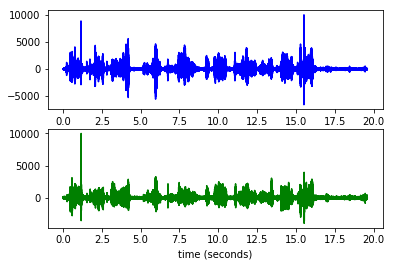

In [18]:
X = getX() # 导入数据
W = train(X) # 使用ICA
S = getS(W,X) # 获得声源
printS(S) # 绘图显示结果

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=863753, comptype='NONE', compname='not compressed')


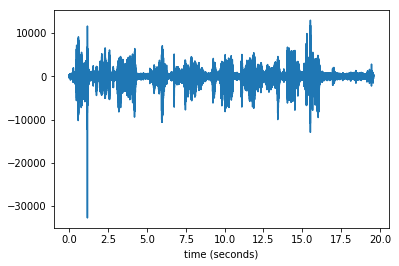

array([-221, -162, -181, ...,   59,   72,   -8], dtype=int16)

In [19]:
readWAV("1.wav",True)

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=863753, comptype='NONE', compname='not compressed')


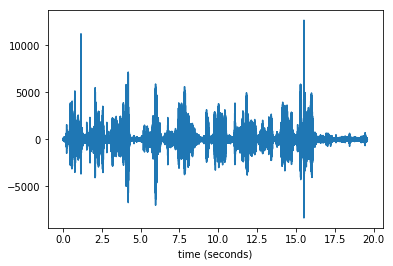

array([  73,   75,   81, ..., -107,  -85,    9], dtype=int16)

In [20]:
readWAV("2.wav",True)

### 2.2 调用SKLEARN的API版

In [21]:
from sklearn.decomposition import FastICA, PCA

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=420714, comptype='NONE', compname='not compressed')
_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=420714, comptype='NONE', compname='not compressed')


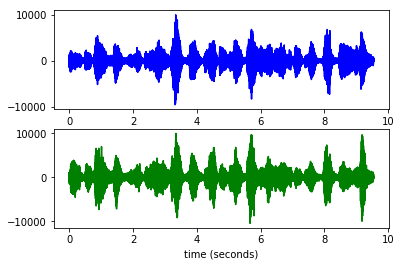

In [22]:
X = getX('new1.wav','new2.wav') # 导入数据
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X.T)
S = normalize(S_.T)
printS(S)

In [23]:
saveS(S,fileS='new_result')

### 2.3 人为混合声音 再ICA拆分

_wave_params(nchannels=1, sampwidth=1, framerate=8000, nframes=50000, comptype='NONE', compname='not compressed')


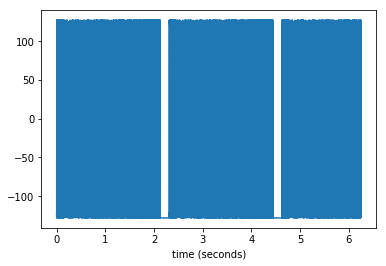

_wave_params(nchannels=1, sampwidth=1, framerate=8000, nframes=50000, comptype='NONE', compname='not compressed')


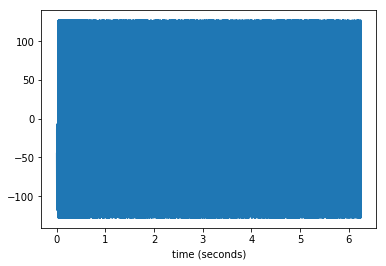

_wave_params(nchannels=1, sampwidth=1, framerate=8000, nframes=50000, comptype='NONE', compname='not compressed')


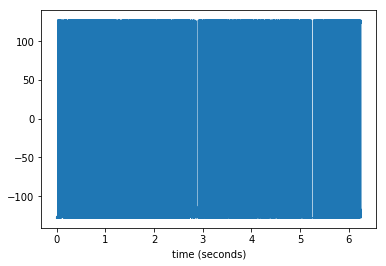

In [24]:
# 源数据
S1 = readWAV('source1.wav',printWAV = True)
S2 = readWAV('source2.wav',printWAV = True)
S3 = readWAV('source3.wav',printWAV = True)

In [25]:
S = np.c_[S1,S2,S3] # 声源
A = [[1,1,1],[2,3,4],[4,3,2]]
X = np.dot(S,A).astype('int16')

Text(0.5,0,'time (seconds)')

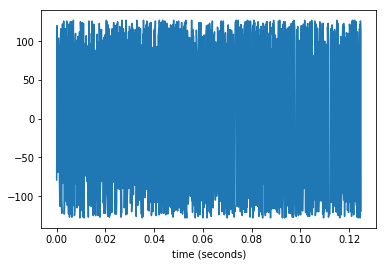

In [26]:
time = np.arange(0, 1000) * (1.0 / 8000)
plt.plot(time, S1[10000:11000])
plt.xlabel("time (seconds)")

Text(0.5,0,'time (seconds)')

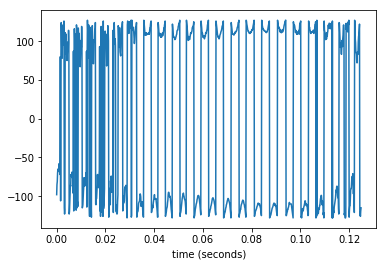

In [27]:
time = np.arange(0, 1000) * (1.0 / 8000)
plt.plot(time, S2[10000:11000])
plt.xlabel("time (seconds)")

Text(0.5,0,'time (seconds)')

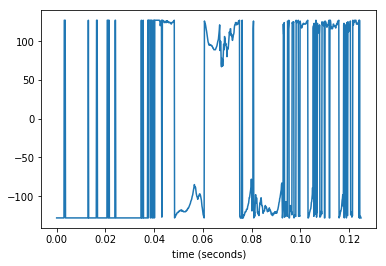

In [28]:
time = np.arange(0, 1000) * (1.0 / 8000)
plt.plot(time, S3[10000:11000])
plt.xlabel("time (seconds)")

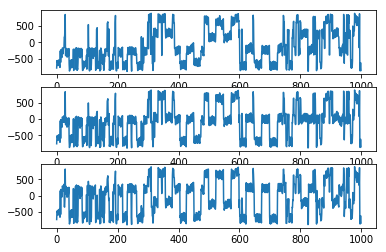

In [29]:
for i in range(3):
    ax = plt.subplot(3,1,i+1)
    plt.plot(X[10000:11000,i])

In [30]:
for i in range(3):
    X[:,i] = X[:,i]/X[:,i].max()*10000

In [31]:
f = wave.open('getX1.wav', "wb")
f.setnchannels(1)
f.setsampwidth(2)
f.setframerate(8000)
f.writeframes(X[:,0].tostring())
f.close()

f = wave.open('getX2.wav', "wb")
f.setnchannels(1)
f.setsampwidth(2)
f.setframerate(8000)
f.writeframes(X[:,1].tostring())
f.close()

f = wave.open('getX3.wav', "wb")
f.setnchannels(1)
f.setsampwidth(2)
f.setframerate(8000)
f.writeframes(X[:,2].tostring())
f.close()

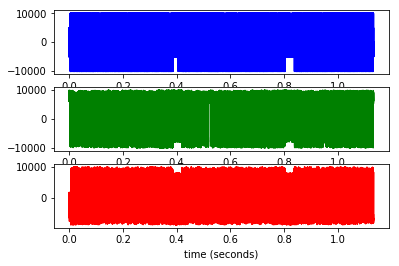

In [32]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)
S_ = normalize(S_.T)
printS(S_)

In [33]:
saveS(S_)

# 其他——官方ICA示例

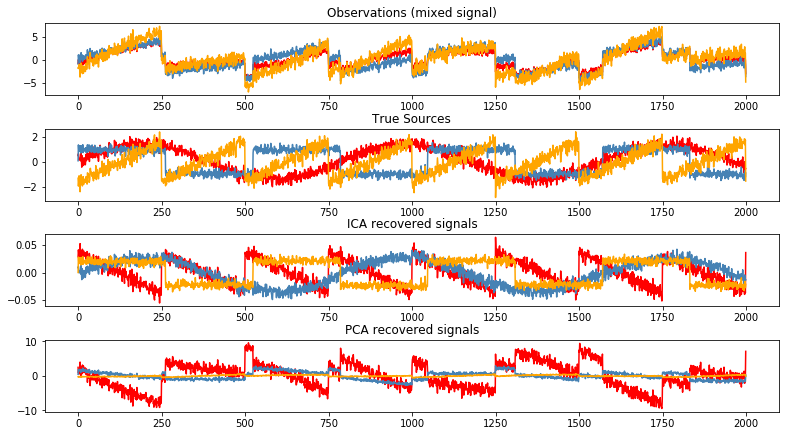

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

plt.figure(figsize=(12,6))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

# 其他——辅助绘图

([], <a list of 0 Text yticklabel objects>)

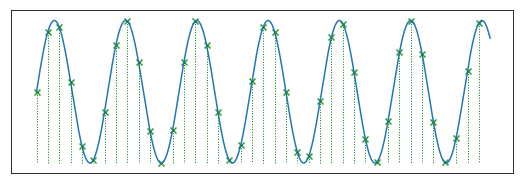

In [35]:
x = np.arange(0, 40, 0.01)
y = np.sin(x)

sample_num = 40
x_ = np.arange(0, 40, 40/sample_num)
y_ = np.sin(x_)

fig = plt.figure(figsize=(9,3))
plt.plot(x,y)
for i in range(sample_num):
    plt.plot([x_[i],x_[i]],[y_[i],-1],c='green',linewidth=1, linestyle=":")
plt.scatter(x_,y_,alpha = 0.8,marker='x',c='green')
plt.xticks([])
plt.yticks([])


([], <a list of 0 Text yticklabel objects>)

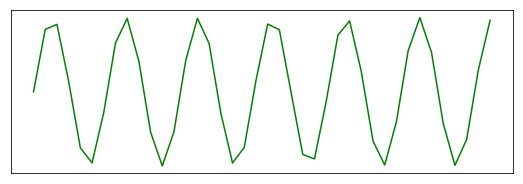

In [36]:
sample_num = 40
x_ = np.arange(0, 40, 40/sample_num)
y_ = np.sin(x_)

fig = plt.figure(figsize=(9,3))
plt.plot(x_,y_,c='green')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

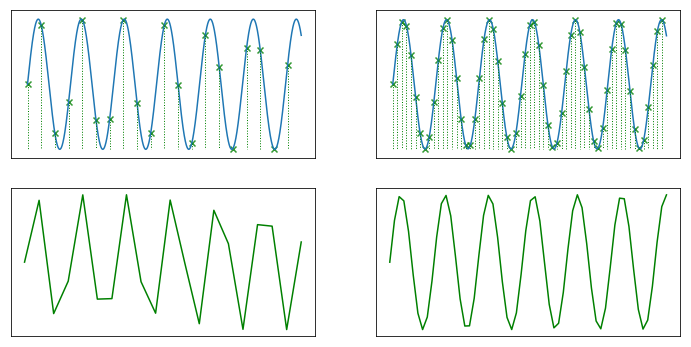

In [37]:
x = np.arange(0, 40, 0.01)
y = np.sin(x)


fig = plt.figure(figsize=(12,6))

# 1
ax = plt.subplot(221)
ax.plot(x,y)
sample_num = 20
x_ = np.arange(0, 40, 40/sample_num)
y_ = np.sin(x_)
for i in range(sample_num):
    ax.plot([x_[i],x_[i]],[y_[i],-1],c='green',linewidth=1, linestyle=":")
ax.scatter(x_,y_,alpha = 0.8,marker='x',c='green')
plt.xticks([]);plt.yticks([])

ax = plt.subplot(223)
plt.plot(x_,y_,c='green')
plt.xticks([]);plt.yticks([])

ax = plt.subplot(222)
ax.plot(x,y)
sample_num = 60
x_ = np.arange(0, 40, 40/sample_num)
y_ = np.sin(x_)
for i in range(sample_num):
    ax.plot([x_[i],x_[i]],[y_[i],-1],c='green',linewidth=1, linestyle=":")
ax.scatter(x_,y_,alpha = 0.8,marker='x',c='green')
plt.xticks([]);plt.yticks([])

ax = plt.subplot(224)
plt.plot(x_,y_,c='green')
plt.xticks([]);plt.yticks([])


([], <a list of 0 Text yticklabel objects>)

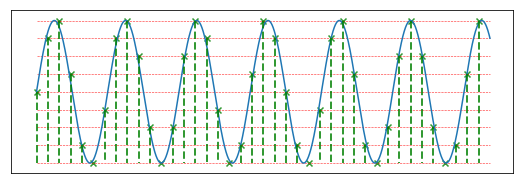

In [38]:
bit = 4

x = np.arange(0, 40, 0.01)
y = np.sin(x)*bit

sample_num = 40
x_ = np.arange(0, 40, 40/sample_num)
y_ = np.around(np.sin(x_)*bit)

fig = plt.figure(figsize=(9,3))
s = np.arange(-bit,bit+0.01,1)
for i in range(len(s)):
    plt.plot([0,40],[s[i],s[i]],c='red',alpha=0.8,linestyle = '--',linewidth=0.6)
plt.plot(x,y)
for i in range(sample_num):
    plt.plot([x_[i],x_[i]],[y_[i],-bit],c='green',linewidth=2, linestyle="--",alpha=0.8)
        
plt.scatter(x_,y_,alpha = 0.8,marker='x',c='green')
plt.xticks([])
plt.yticks([])


([], <a list of 0 Text yticklabel objects>)

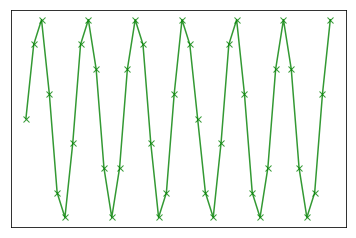

In [39]:
bit = 4

sample_num = 40
x_ = np.arange(0, 40, 40/sample_num)
y_ = np.around(np.sin(x_)*bit)

        
plt.plot(x_,y_,alpha = 0.8,marker='x',c='green')
plt.xticks([])
plt.yticks([])

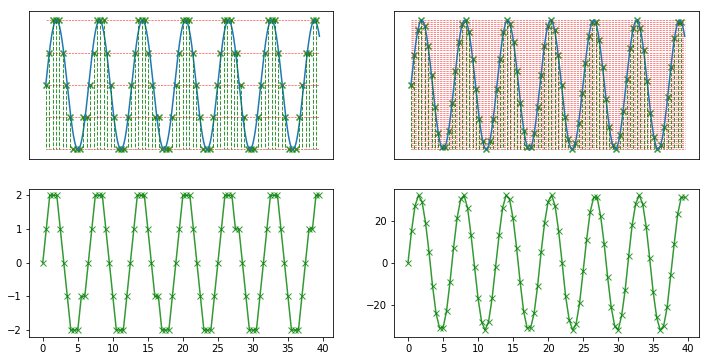

In [40]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(221)
bit = 2
x = np.arange(0, 40, 0.01)
y = np.sin(x)*bit
sample_num = 80
x_ = np.arange(0, 40, 40/sample_num)
y_ = np.around(np.sin(x_)*bit)

s = np.arange(-bit,bit+0.01,1)
for i in range(len(s)):
    ax.plot([0,40],[s[i],s[i]],c='red',alpha=0.8,linestyle = '--',linewidth=0.6)
ax.plot(x,y)
for i in range(sample_num):
    ax.plot([x_[i],x_[i]],[y_[i],-bit],c='green',linewidth=1, linestyle="--",alpha=0.8)
        
ax.scatter(x_,y_,alpha = 0.8,marker='x',c='green')
plt.xticks([])
plt.yticks([])

ax = plt.subplot(223)
ax.plot(x_,y_,alpha = 0.8,marker='x',c='green')


ax = plt.subplot(222)
bit = 32
x = np.arange(0, 40, 0.01)
y = np.sin(x)*bit
sample_num = 80
x_ = np.arange(0, 40, 40/sample_num)
y_ = np.around(np.sin(x_)*bit)

s = np.arange(-bit,bit+0.01,1)
for i in range(len(s)):
    ax.plot([0,40],[s[i],s[i]],c='red',alpha=0.8,linestyle = '--',linewidth=0.6)
ax.plot(x,y)
for i in range(sample_num):
    ax.plot([x_[i],x_[i]],[y_[i],-bit],c='green',linewidth=1, linestyle="--",alpha=0.8)
        
ax.scatter(x_,y_,alpha = 0.8,marker='x',c='green')
plt.xticks([])
plt.yticks([])

ax = plt.subplot(224)
ax.plot(x_,y_,alpha = 0.8,marker='x',c='green')